In [7]:
import glob
import re
import pandas as pd
glob.glob('../outputs/forecasting/*.txt')

['../outputs/forecasting/solar_TCN_log.txt',
 '../outputs/forecasting/exchange_TCN_log.txt',
 '../outputs/forecasting/solar_Trans_log.txt',
 '../outputs/forecasting/exchange_Trans_log.txt',
 '../outputs/forecasting/exchange_TCN_log_cp.txt',
 '../outputs/forecasting/electricity_TCN_log.txt',
 '../outputs/forecasting/exchange_LSTM_log.txt',
 '../outputs/forecasting/electricity_Trans_log.txt',
 '../outputs/forecasting/air-quality_LSTM_log.txt',
 '../outputs/forecasting/solar_LSTM_log.txt',
 '../outputs/forecasting/air-quality_TCN_log.txt',
 '../outputs/forecasting/electricity_LSTM_log.txt',
 '../outputs/forecasting/air-quality_Trans_log.txt']

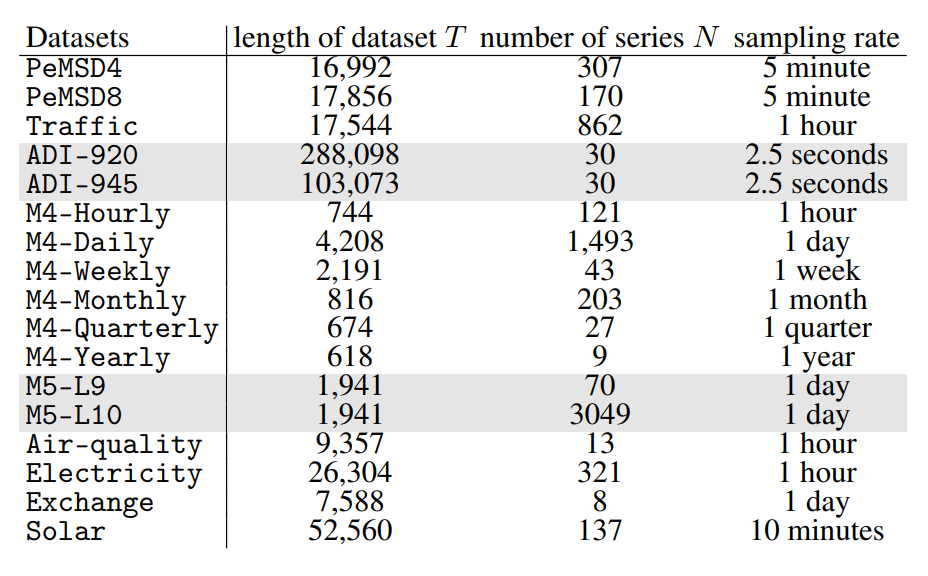

In [86]:
from IPython import display
display.Image("dataset_statistics.png")

In [79]:
summary = []
for path in glob.glob('../outputs/forecasting/*.txt'):
    file_name = path.split('/')[-1]
    dataset, model, _ = file_name.split('_')
    #print(f'{dataset}, {model}, {file_name}')
    
    f = open(path, "r").read()
    epoch_eval = re.findall(r"epoch = (\d*) , trn loss = (\d*\.\d*) , trn err = (\d*\.\d*) , val loss = (\d*\.\d*) , val err = (\d*\.\d*) , tst loss = (\d*\.\d*) , tst err = (\d*\.\d*)", f)
    epoch_eval_df = pd.DataFrame(epoch_eval).astype('float64')
    epoch_eval_df.columns = ['epoch', 'trn_loss', 'trn_err', 'val_loss', 'val_err', 'tst_loss', 'tst_err']
    
    # final error according to validation error
    final_err = epoch_eval_df['tst_err'][epoch_eval_df['val_err'].idxmin()]
    exp = [dataset, model, final_err]
    summary.append(exp)
summary_df = pd.DataFrame(summary)
summary_df.columns = ['dataset', 'model', 'tst_err']
summary_df = summary_df.sort_values(by=['dataset', 'model'])
summary_df

# need to check the pre-trained model of transformer

,dataset,model,tst_err
7,air-quality,LSTM,0.202244
9,air-quality,TCN,0.196744
11,air-quality,Trans,0.218937
10,electricity,LSTM,0.079263
4,electricity,TCN,0.077323
6,electricity,Trans,0.086476
5,exchange,LSTM,0.085054
1,exchange,TCN,0.098274
3,exchange,Trans,0.164443
8,solar,LSTM,0.151588


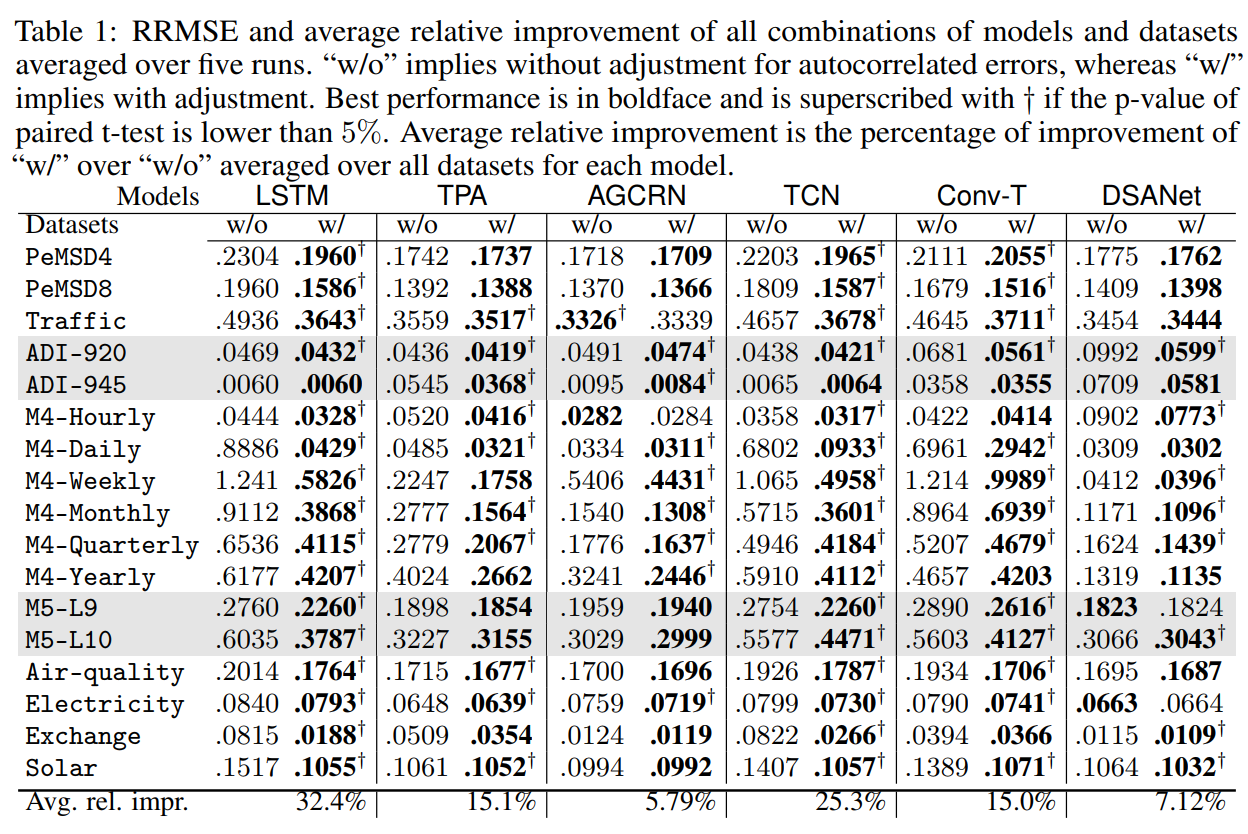

In [85]:
display.Image("results_from_paper.png")

In [67]:

f = open(path, "r").read()
epoch_eval = re.findall(r"epoch = (\d*) , trn loss = (\d*\.\d*) , trn err = (\d*\.\d*) , val loss = (\d*\.\d*) , val err = (\d*\.\d*) , tst loss = (\d*\.\d*) , tst err = (\d*\.\d*)", f)
epoch_eval_df = pd.DataFrame(epoch_eval).astype('float64')
epoch_eval_df.columns = ['epoch', 'trn_loss', 'trn_err', 'val_loss', 'val_err', 'tst_loss', 'tst_err']
#epoch_eval_df
final_err = epoch_eval_df['tst_err'][epoch_eval_df['val_err'].idxmin()]

,epoch,trn_loss,trn_err,val_loss,val_err,tst_loss,tst_err
0,1.0,0.211814,0.460339,0.212270,0.479836,0.214748,0.535034
1,2.0,0.111614,0.334164,0.127255,0.371524,0.131682,0.418967
2,3.0,0.063288,0.251629,0.090802,0.313832,0.095395,0.356598
3,4.0,0.045095,0.212406,0.063609,0.262669,0.064006,0.292096
4,5.0,0.036543,0.191208,0.049307,0.231261,0.042982,0.239363
5,6.0,0.031246,0.176808,0.049694,0.232167,0.045790,0.247060
6,7.0,0.029127,0.170706,0.040905,0.210638,0.035951,0.218912
7,8.0,0.029086,0.170586,0.045380,0.221860,0.037470,0.223490
8,9.0,0.026462,0.162709,0.040215,0.208854,0.035959,0.218937
9,10.0,0.026312,0.162248,0.043667,0.217633,0.033027,0.209821


In [69]:
epoch_eval_df['tst_err'][epoch_eval_df['val_err'].idxmin()]

0.218937

In [70]:
['a', 1, 3]

['a', 1, 3]